In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений

Сгенерируем примеры из распределения

In [ ]:
cosine_rv = sts.cosine()
sample = cosine_rv.rvs(100)
sample

In [ ]:
real_mean = cosine_rv.mean() # настоящее среднее случайной величины
real_mean

0.0

In [ ]:
real_var = cosine_rv.var() # настоящая дисперсия случайной величины
real_var

1.2898681336964528

Построим гистограмму выборки и теоретическую плотность распределения

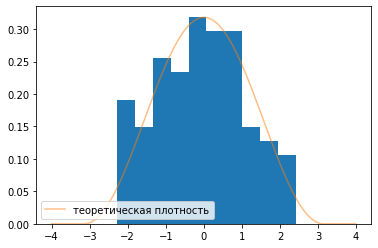

In [ ]:
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = cosine_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend(loc='lower left')
plt.show()

In [ ]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

-0.06257077462342683
1.4132183335785613


Оценим распределение выборочного среднего для разных объёмов выборок

Для этого построим на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок. Для теоретического распределение используем настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).


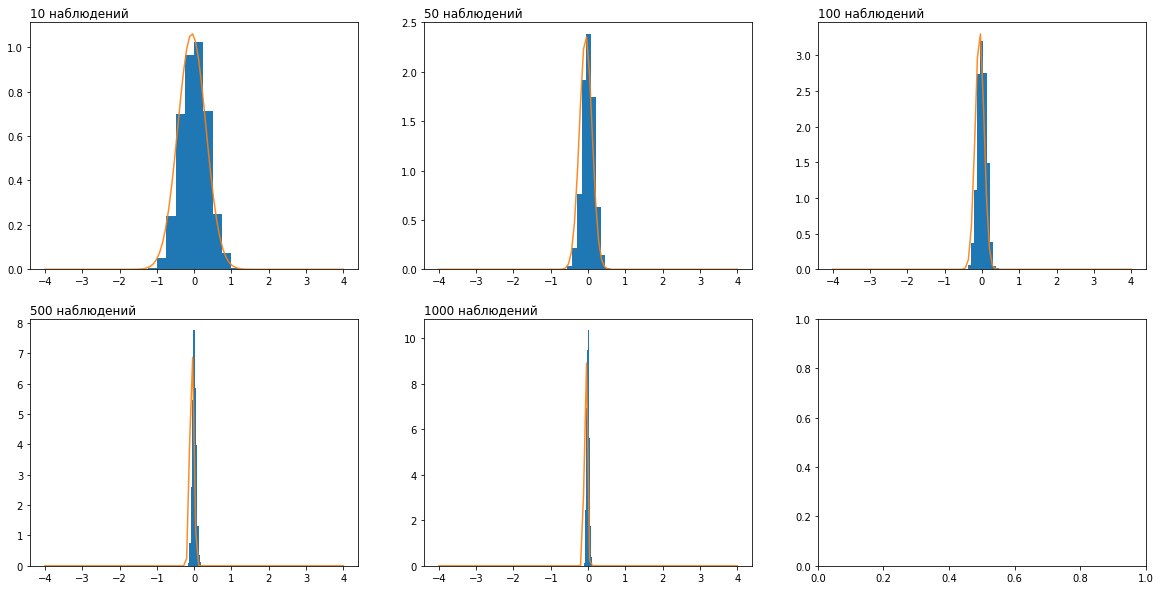

In [ ]:
sample_size = [10, 50, 100, 500, 1000]
sample_number = 1000
fig, ax = plt.subplots(nrows=math.ceil(len(sample_size)/3), ncols=3)
counter = 0
for size in sample_size:
  mean_values = []
  for _ in range(sample_number):
    mean_values.append(cosine_rv.rvs(size).mean())
  norm = sts.norm(sample_mean, scale = sample.std()/np.sqrt(size))
  pdf = norm.pdf(x)
  
  counter += 1
  nrow = math.ceil(counter / 3) - 1
  ncol = counter % 3 - 1 if (counter % 3) != 0 else 2
  ax[nrow][ncol].hist(mean_values, density=True)
  ax[nrow][ncol].plot(x, pdf, alpha=0.9)
  ax[nrow][ncol].set_title('{} наблюдений'.format(size), loc='left')
fig.set_size_inches(20,10)
plt.show()

**Вывод**: с увеличением размера выборки выборочное среднее стремится к значению среднего исходного распределения. Апроксимация работает хорошо.

# Доверительный интервал на основе ЦПТ

**Задание:** Возьмем данные для оттока телеком компании, и построим доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). Для оценки дисперсии используем несмещенную оценку (параметр ddof=1). Сделаем оценку с использованием явной формулы для z интервала, а затем с помощью функций from statsmodels.stats.weightstats import _zconfint_generic. Сравним результаты.

In [34]:
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Сделаем срезы необходимых для анализа данных

In [13]:
churn_false = df[df['churn'] == False]['total day calls']
churn_false.head(3)

0    110
1    123
2    114
Name: total day calls, dtype: int64

In [14]:
churn_true = df[df['churn'] == True]['total day calls']
churn_true.head(3)

10    137
15     67
21     89
Name: total day calls, dtype: int64

Количество элементов в каждой выборке

In [22]:
n_false = len(churn_false)
n_true = len(churn_true)
print(n_false, n_true)

2850 483


Среднее значение

In [23]:
mean_false = churn_false.mean()
mean_true = churn_true.mean()
print(mean_false, mean_true)

100.28315789473685 101.33540372670808


Стандартное отклонение

In [35]:
std_false = churn_false.std(ddof=1)
std_true = churn_true.std(ddof=1)
print(std_false, std_true)

19.801156951805293 21.58230721307551


Найдем стандартную ошибку среднего по формуле:
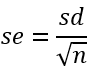

In [25]:
se_false = std_false / (n_false ** 0.5)
se_true = std_true / (n_true ** 0.5)
print(se_false, se_true)

0.37090965307926127 0.9820289815371145


Расчитаем доверительный интервал в который попадает 95% элементов для каждой выборки

In [27]:
[mean_false - 1.96 * se_false, mean_false + 1.96 * se_false]

[99.55617497470149, 101.0101408147722]

In [28]:
[mean_true - 1.96 * se_true, mean_true + 1.96 * se_true]

[99.41062692289533, 103.26018053052083]

Расчитаем доверительный интервал с использованием функции python

In [29]:
from statsmodels.stats.weightstats import _zconfint_generic

In [31]:
_zconfint_generic(mean_false, se_false, 0.05, alternative='two-sided')

(99.55618833318324, 101.01012745629045)

In [32]:
_zconfint_generic(mean_true, se_true, 0.05, alternative='two-sided')

(99.41066229112079, 103.26014516229537)

**Вывод:** В результате работы получены одинаковые довертельные интервалы рассчитанные явно с использованием формул и встроенной функции python. В дальнейшем для расчета доверительного интервала для экономии времени можно использовать готовую функцию _zconfint_generic